# Машинне навчання

## Метод дерева прийняття рішень (decision tree)

###  Лабораторна робота 1

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 1* 

*Постановка задачі*

1. Розділити всю вибірку на навчальну та тестову
2. Побудувати алгоритм навчання на навчальній вибірці з використанням вбудованого алгоритму DecisionTreeClassifier() з бібліотеки sklearn
3. Перевірити результати роботи на тестовій вибірці.
4. Вивести на екран дерево.
5. Оформити результати у вигляді звіту.

### Розглянемо перший датасет

* Імпортуємо необхідні бібліотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

# Імпорт модуля метрик scikit-learn для розрахунку точності
from sklearn import metrics 

from sklearn.tree import export_graphviz
from io import StringIO 

from IPython.display import Image  
import graphviz 
import pydotplus 

In [3]:
!pip install graphviz
!pip install pydotplus

In [4]:
#conda install graphviz

* Будемо розглядати датасет __creditcard.csv__. Виведемо його у формі датафрейму.

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#data.info()

* Далі визначаємо ознаки та цільову змінну. Ділимо вибірку на навчальну і тестову. Виведемо їх розмірності.

In [8]:
X = data.drop(columns='Class', axis=1)
y = data['Class']

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = \
                 train_test_split(X, y, test_size = 0.25, random_state = 1) # 75% training and 25% test
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(213605, 30) (71202, 30)
(213605,) (71202,)


* Створюємо об'єкт класифікатора дерева рішень. За замовчуванням у класифікатора стоїть критерій *gini* (default="gini"), тому можна не вказувати його. Максимальна глибина дерева буде 3.
* Створюємо класифікатор дерева прийняття рішень для тренувань.
* Робимо прогноз на тестовому наборі даних.

In [11]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

* Перевіряємо результати роботи на тестовій вибірці за допомогою точності моделі (як часто класифікатор є правильним):

In [12]:
y_pred = clf.predict(X_test)
print("Оцінка тестового набору даних: ", metrics.accuracy_score(y_test, y_pred))

Оцінка тестового набору даних:  0.9991713715906857


* Виводимо на екран дерево прийняття рішень:

[Text(0.5, 0.875, 'X[17] <= -2.789\ngini = 0.004\nsamples = 213605\nvalue = [213224, 381]'),
 Text(0.25, 0.625, 'X[10] <= -2.129\ngini = 0.348\nsamples = 348\nvalue = [78, 270]'),
 Text(0.125, 0.375, 'X[26] <= -0.225\ngini = 0.256\nsamples = 305\nvalue = [46, 259]'),
 Text(0.0625, 0.125, 'gini = 0.442\nsamples = 103\nvalue = [34, 69]'),
 Text(0.1875, 0.125, 'gini = 0.112\nsamples = 202\nvalue = [12, 190]'),
 Text(0.375, 0.375, 'X[21] <= 0.304\ngini = 0.381\nsamples = 43\nvalue = [32, 11]'),
 Text(0.3125, 0.125, 'gini = 0.124\nsamples = 30\nvalue = [28, 2]'),
 Text(0.4375, 0.125, 'gini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.75, 0.625, 'X[14] <= -8.092\ngini = 0.001\nsamples = 213257\nvalue = [213146, 111]'),
 Text(0.625, 0.375, 'X[15] <= 1.423\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.375, 'X[14] <= -4.661\ngini = 0.001\nsampl

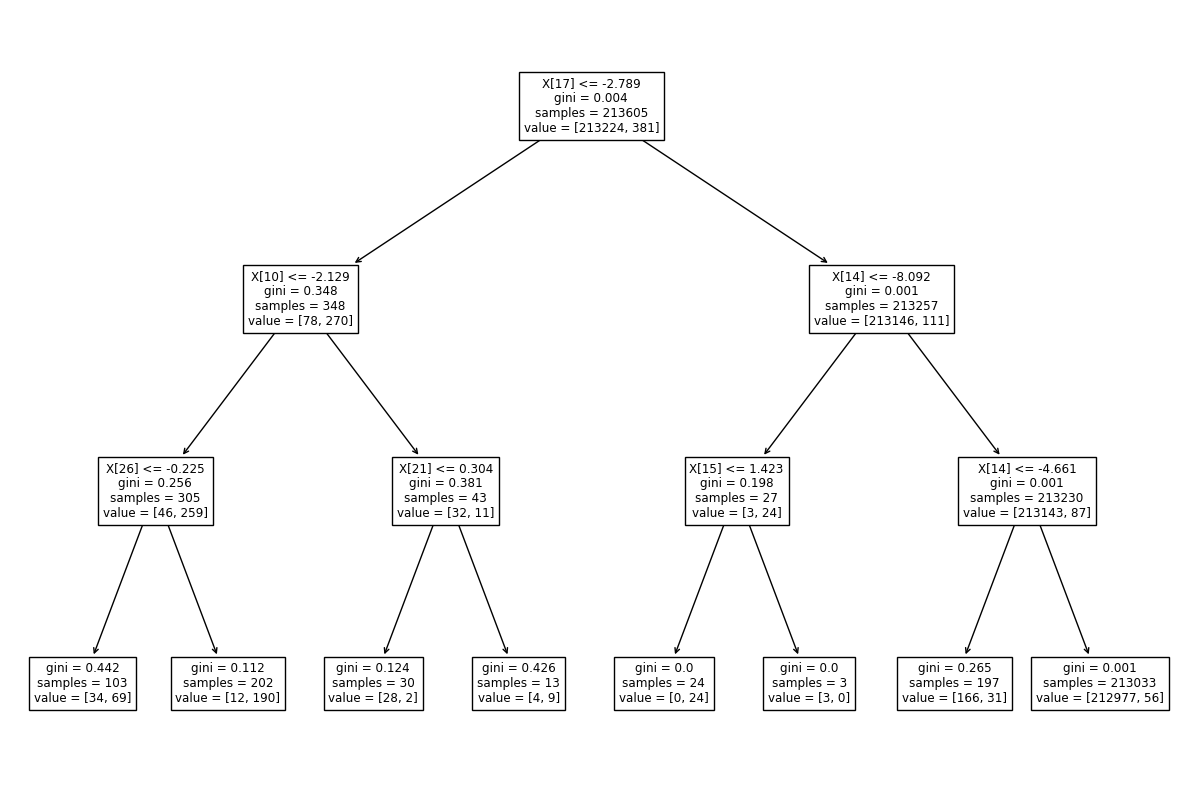

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.fit(X_train, y_train))

* Візуалізуємо дерево більш детально

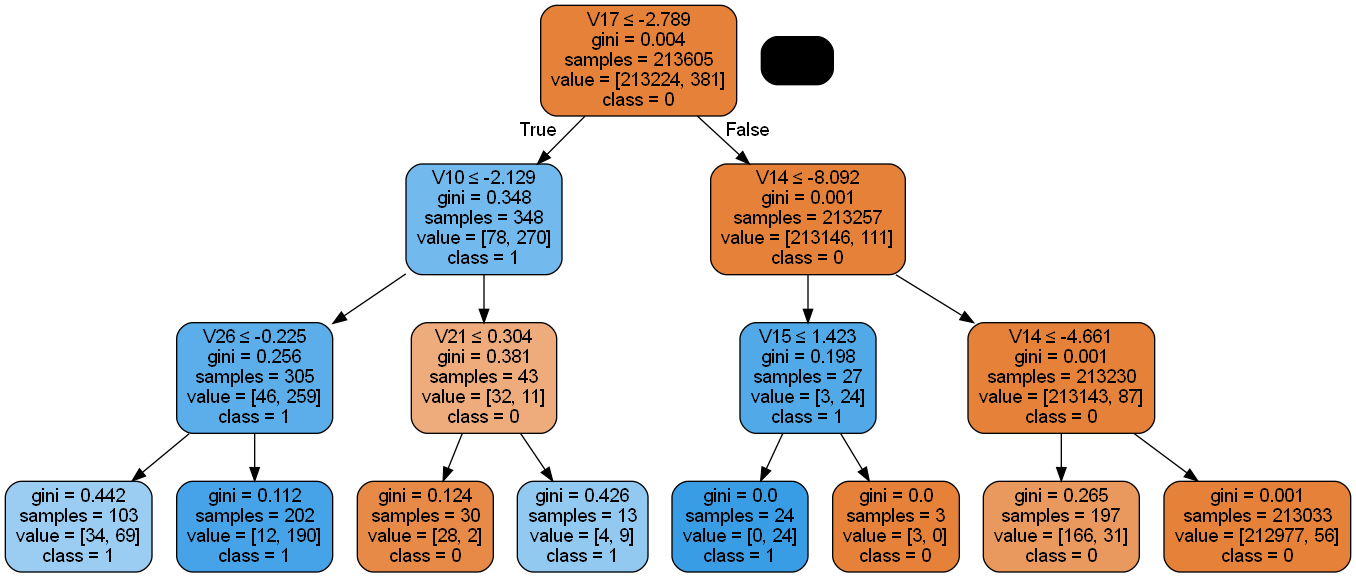

In [14]:
feature_cols_credit = [i for i in X.columns]

dot_data_credit = StringIO()
export_graphviz(clf, out_file = dot_data_credit,  
                feature_names = feature_cols_credit,  
                class_names = ["0", "1"],  
                filled = True, rounded = True,  
                special_characters = True)

graph_credit = pydotplus.graph_from_dot_data(dot_data_credit.getvalue())  
graph_credit.write_png('lab1_credit.png')
Image(graph_credit.create_png())

### Розглянемо тепер інший датасет

* Імпортуємо необхідні бібліотеки

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

* Будемо розглядати датасет __iris__. Далі визначаємо ознаки та цільову змінну. Виведемо датасет у формі датафрейму

In [16]:
iris = load_iris()

In [17]:
X2, y2 = iris.data, iris.target

In [18]:
# dfIris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
dfIris = pd.DataFrame(data = np.c_[X2, y2], columns = iris['feature_names'] + ['target'])
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


*Класи розглянутих об'єктів:*

In [19]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [20]:
print(dfIris['target'].unique())

[0. 1. 2.]


* Ділимо вибірку на навчальну і тестову. Виведемо їх розмірності.

In [21]:
X2_train, X2_test, y2_train, y2_test = \
                 train_test_split(X2, y2, test_size = 0.25, random_state = 1) # 75% training and 25% test
print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(112, 4) (38, 4)
(112,) (38,)


* Створюємо об'єкт класифікатора дерева рішень. За замовчуванням у класифікатора стоїть критерій *gini* (default="gini"), тому можна не вказувати його. Максимальна глибина дерева буде 3.
* Створюємо класифікатор дерева прийняття рішень для тренувань.
* Робимо прогноз на тестовому наборі даних.

In [22]:
clf2 = DecisionTreeClassifier(random_state=0, max_depth=3)
clf2 = clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

* Перевіряємо результати роботи на тестовій вибірці за допомогою точності моделі (як часто класифікатор є правильним):

In [23]:
y2_pred = clf2.predict(X2_test)
print("Оцінка тестового набору даних: ", metrics.accuracy_score(y2_test, y2_pred))

Оцінка тестового набору даних:  0.9736842105263158


* Виводимо на екран дерево прийняття рішень:

In [24]:
#plt.figure(figsize=(10,9))
#tree.plot_tree(clf2.fit(X2_train, y2_train))
#plt.title("Дерево прийняття рішень (decision tree)") 

In [25]:
decision_tree_iris = clf2
tx = export_text(decision_tree_iris, feature_names=iris['feature_names'])
print(tx)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



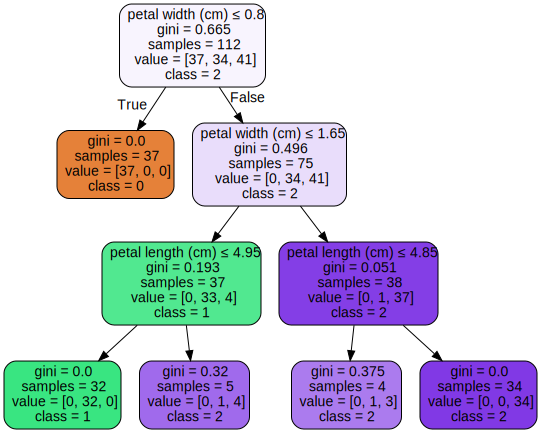

In [26]:
dot_data = tree.export_graphviz(clf2, out_file = None, 
                     feature_names = iris.feature_names,  
                     class_names = ["0", "1", "2"],  
                     filled = True, rounded = True,  
                     special_characters = True)  
graph = graphviz.Source(dot_data)  
#graph.save('lab1_iris.png')
graph.render("lab1_iris") 
graph

* Наступний варіант з назвами класів ірисів.

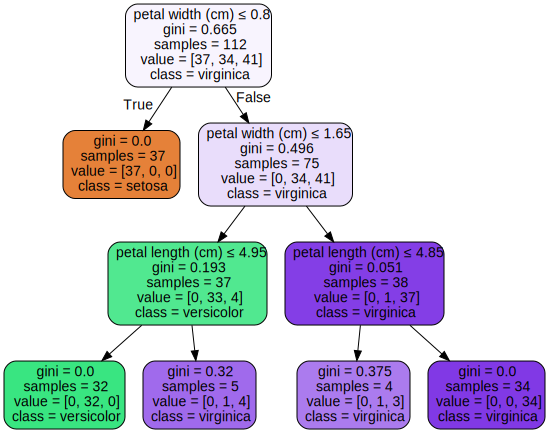

In [27]:
dot_data2 = tree.export_graphviz(clf2, out_file = None, 
                     feature_names = iris.feature_names,  
                     class_names = iris.target_names,  
                     filled = True, rounded = True,  
                     special_characters = True)  
graph2 = graphviz.Source(dot_data2)  
#graph2.save('lab1_iris_classColors.jpg')
graph2.render("lab1_iris_classColors") 
graph2